In [55]:
import rbc_comparison_utils
%matplotlib inline

In [56]:
img_path = 'RCM_cells_cleaned_paper_final' #'RCM_cells_cleaned_paper'
# img_path = 'RCM_cells_cleaned_paper' #'RCM_cells_cleaned_paper'

model_path = 'Experiments_log/20231020_085650/model_weights_4.pth' # NOT21,BEST42,OK4, Good105 4,21,42

'''
# Good ones
Experiments_log/20231020_085650/model_weights_4.pth
Experiments_log/20231026_070620/model_weights_4.pth


'''


'\n# Good ones\nExperiments_log/20231020_085650/model_weights_4.pth\nExperiments_log/20231026_070620/model_weights_4.pth\n\n\n'

In [57]:
img_class_df = rbc_comparison_utils.rbf_classification(img_path, model_path)

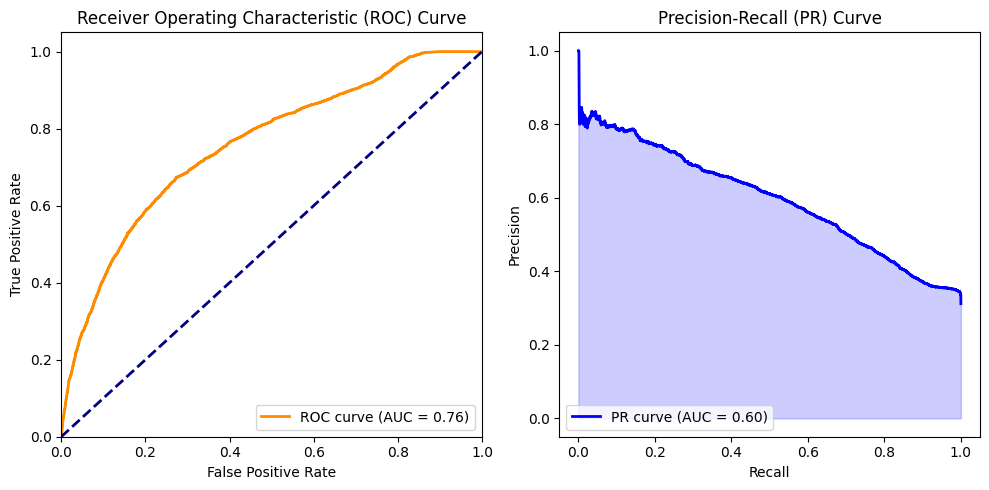

ROC AUC: 0.76
PR AUC: 0.60
Accuracy: 0.72
Sensitivity (Recall or TPR): 0.64
Specificity (TNR): 0.76


In [58]:
# Calculate and plot ROC, PR, and AUC
rbc_comparison_utils.calculate_and_plot_roc_pr_auc(img_class_df)

In [59]:
img_class_df

img_class_df.to_csv('classified_cells.csv', index=False)

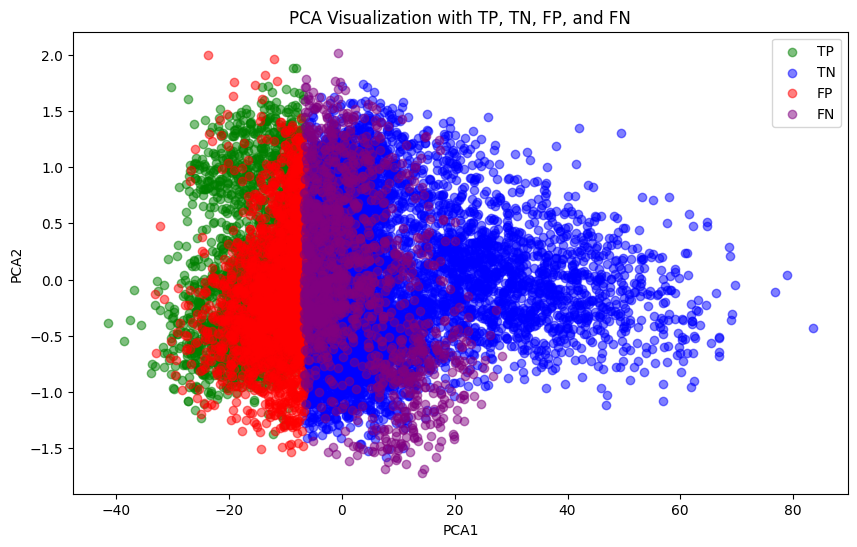

In [60]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract the 1000-dimensional vector features, true labels, and predicted probabilities
X = img_class_df['vector_features'].values.tolist()
y_true = img_class_df['true_label'].values.tolist()
y_pred_prob = img_class_df['predicted_probability'].values.tolist()

# Round the predicted probabilities to obtain predicted labels
y_pred = [1 if prob >= 0.5 else 0 for prob in y_pred_prob]

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the features to 2 dimensions
X_2d = pca.fit_transform(X)

# Create a new DataFrame with the reduced features, true labels, and predicted labels
pca_df = pd.DataFrame(data=X_2d, columns=['PCA1', 'PCA2'])
pca_df['true_label'] = y_true
pca_df['predicted_label'] = y_pred

# Separate data by TP, TN, FP, and FN
TP = pca_df[(pca_df['true_label'] == 1) & (pca_df['predicted_label'] == 1)]
TN = pca_df[(pca_df['true_label'] == 0) & (pca_df['predicted_label'] == 0)]
FP = pca_df[(pca_df['true_label'] == 0) & (pca_df['predicted_label'] == 1)]
FN = pca_df[(pca_df['true_label'] == 1) & (pca_df['predicted_label'] == 0)]

# Create a scatter plot with different colors for TP, TN, FP, and FN
plt.figure(figsize=(10, 6))
plt.scatter(TP['PCA1'], TP['PCA2'], label='TP', c='green', alpha=0.5)
plt.scatter(TN['PCA1'], TN['PCA2'], label='TN', c='blue', alpha=0.5)
plt.scatter(FP['PCA1'], FP['PCA2'], label='FP', c='red', alpha=0.5)
plt.scatter(FN['PCA1'], FN['PCA2'], label='FN', c='purple', alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('PCA Visualization with TP, TN, FP, and FN')
plt.show()


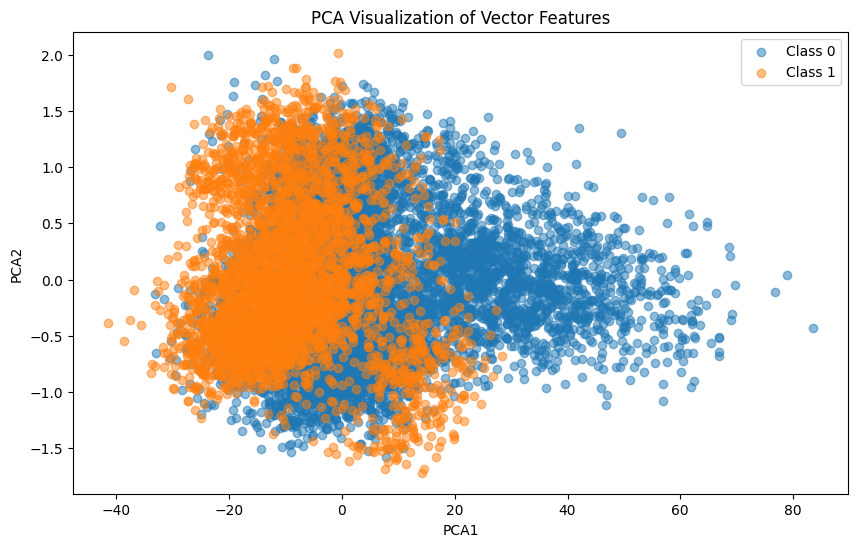

In [61]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Extract the 1000-dimensional vector features and true labels
X = img_class_df['vector_features'].values.tolist()
y = img_class_df['true_label'].values.tolist()

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit and transform the features to 2 dimensions
X_2d = pca.fit_transform(X)

# Create a new DataFrame with the reduced features
pca_df = pd.DataFrame(data=X_2d, columns=['PCA1', 'PCA2'])
pca_df['true_label'] = y

# Separate data by class
class_0 = pca_df[pca_df['true_label'] == 0]
class_1 = pca_df[pca_df['true_label'] == 1]

# Create a scatter plot to visualize the distinctions
plt.figure(figsize=(10, 6))
plt.scatter(class_0['PCA1'], class_0['PCA2'], label='Class 0', alpha=0.5)
plt.scatter(class_1['PCA1'], class_1['PCA2'], label='Class 1', alpha=0.5)
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.title('PCA Visualization of Vector Features')
plt.show()


In [62]:
explained_variance = pca.explained_variance_ratio_

total_variance_captured_by_2_pcs = sum(explained_variance[:2])

print(f"Total variance captured by the first 2 PCs: {total_variance_captured_by_2_pcs * 100:.2f}%")


Total variance captured by the first 2 PCs: 97.57%


In [63]:
# Drop the 'vector_features' column from img_class_df
new_df = img_class_df.drop(columns=['vector_features'])

# Add the two PCA features to the new DataFrame
new_df['PCA1'] = pca_df['PCA1']
new_df['PCA2'] = pca_df['PCA2']

# new_df.to_csv('classified_cells_oca.csv', index=False)

In [64]:
new_df.to_csv('classified_cells_pca.csv', index=False)

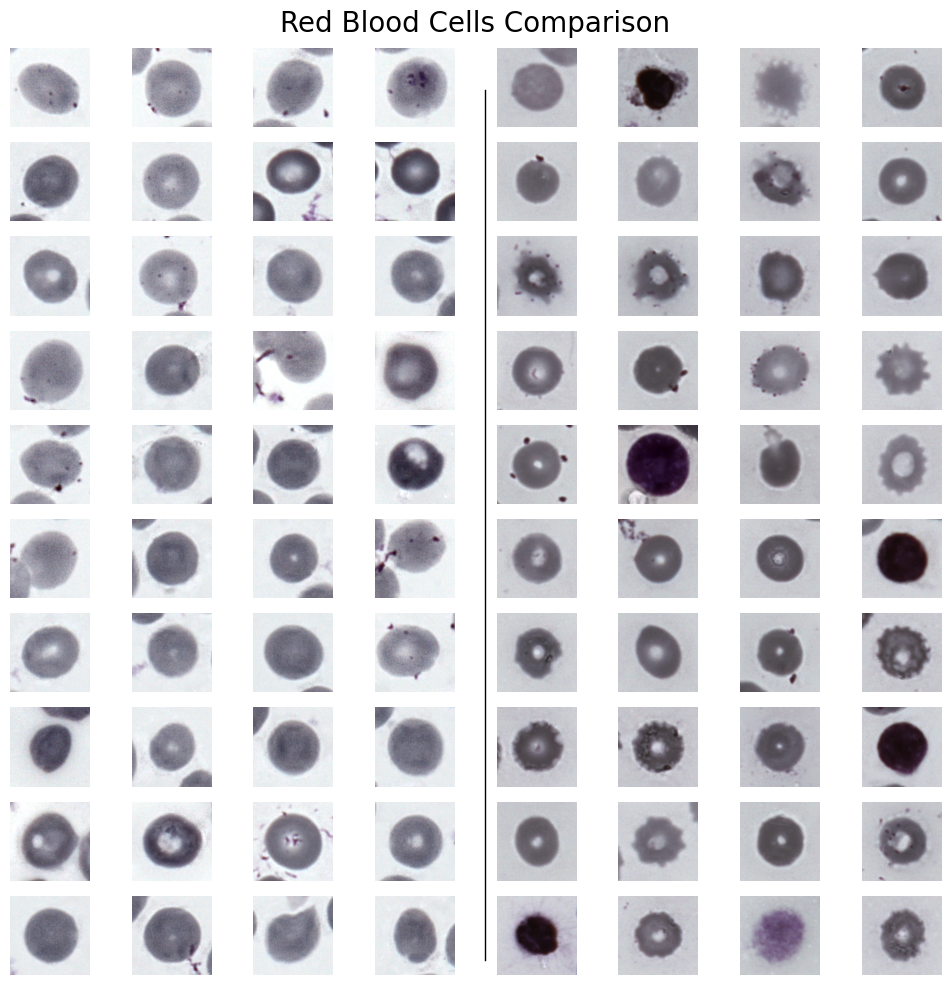

In [65]:
most_non_sma_rbcs, most_sma_rbcs = rbc_comparison_utils.rbf_n_comparison1(img_class_df, num_rbcs_per_class=40)
fig_rbc_img_comp = rbc_comparison_utils.display_rbc_comparison(most_non_sma_rbcs, most_sma_rbcs)

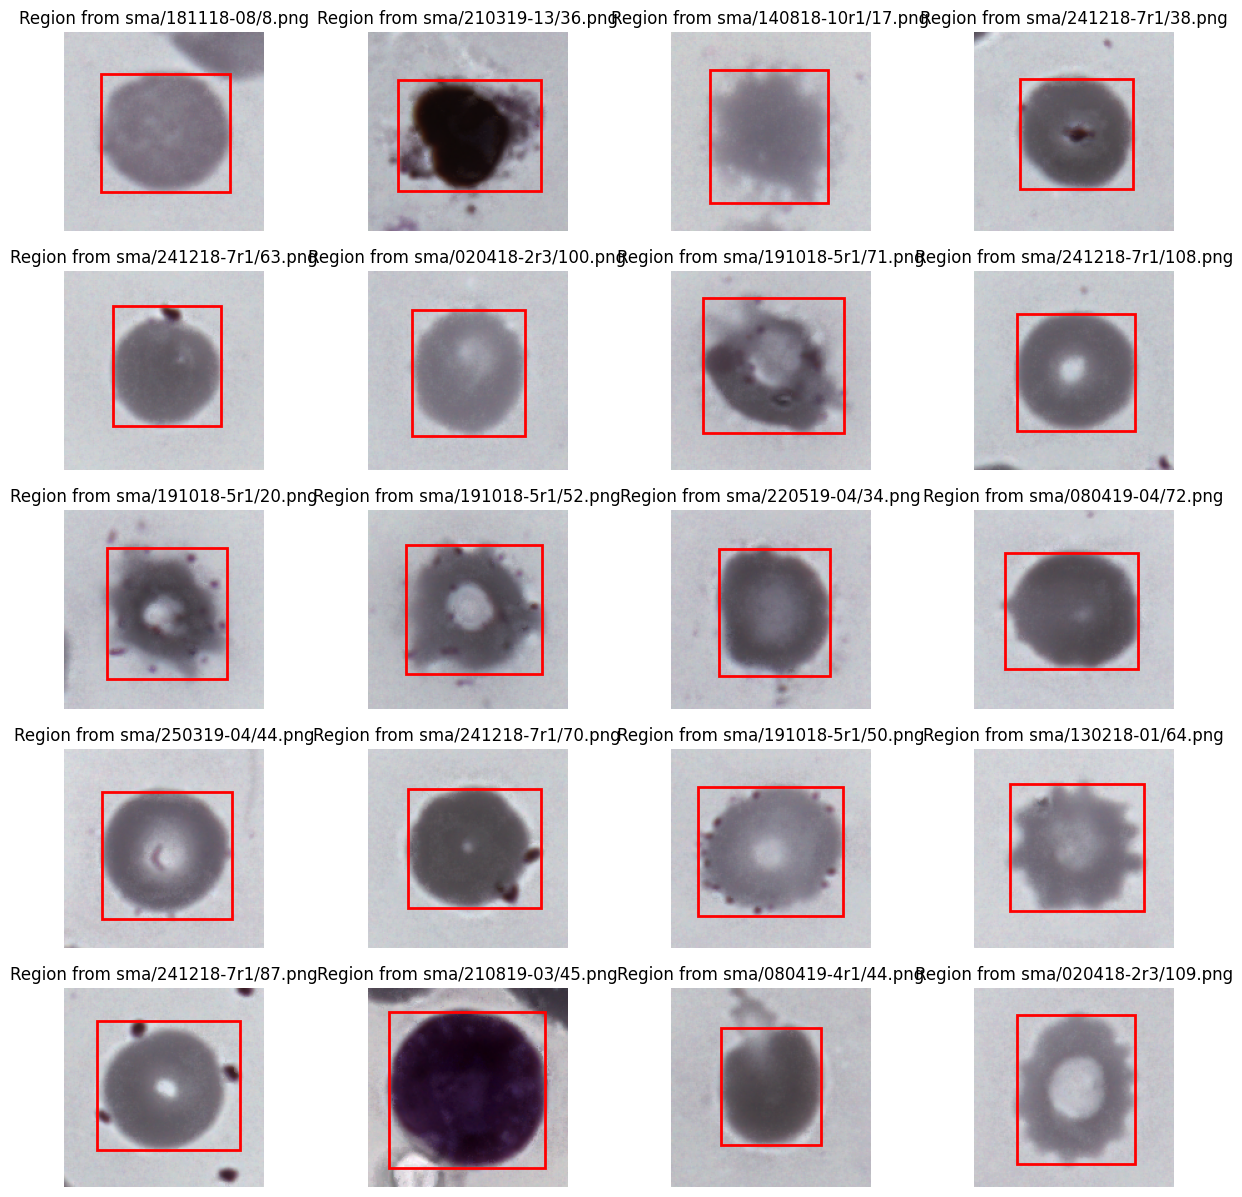

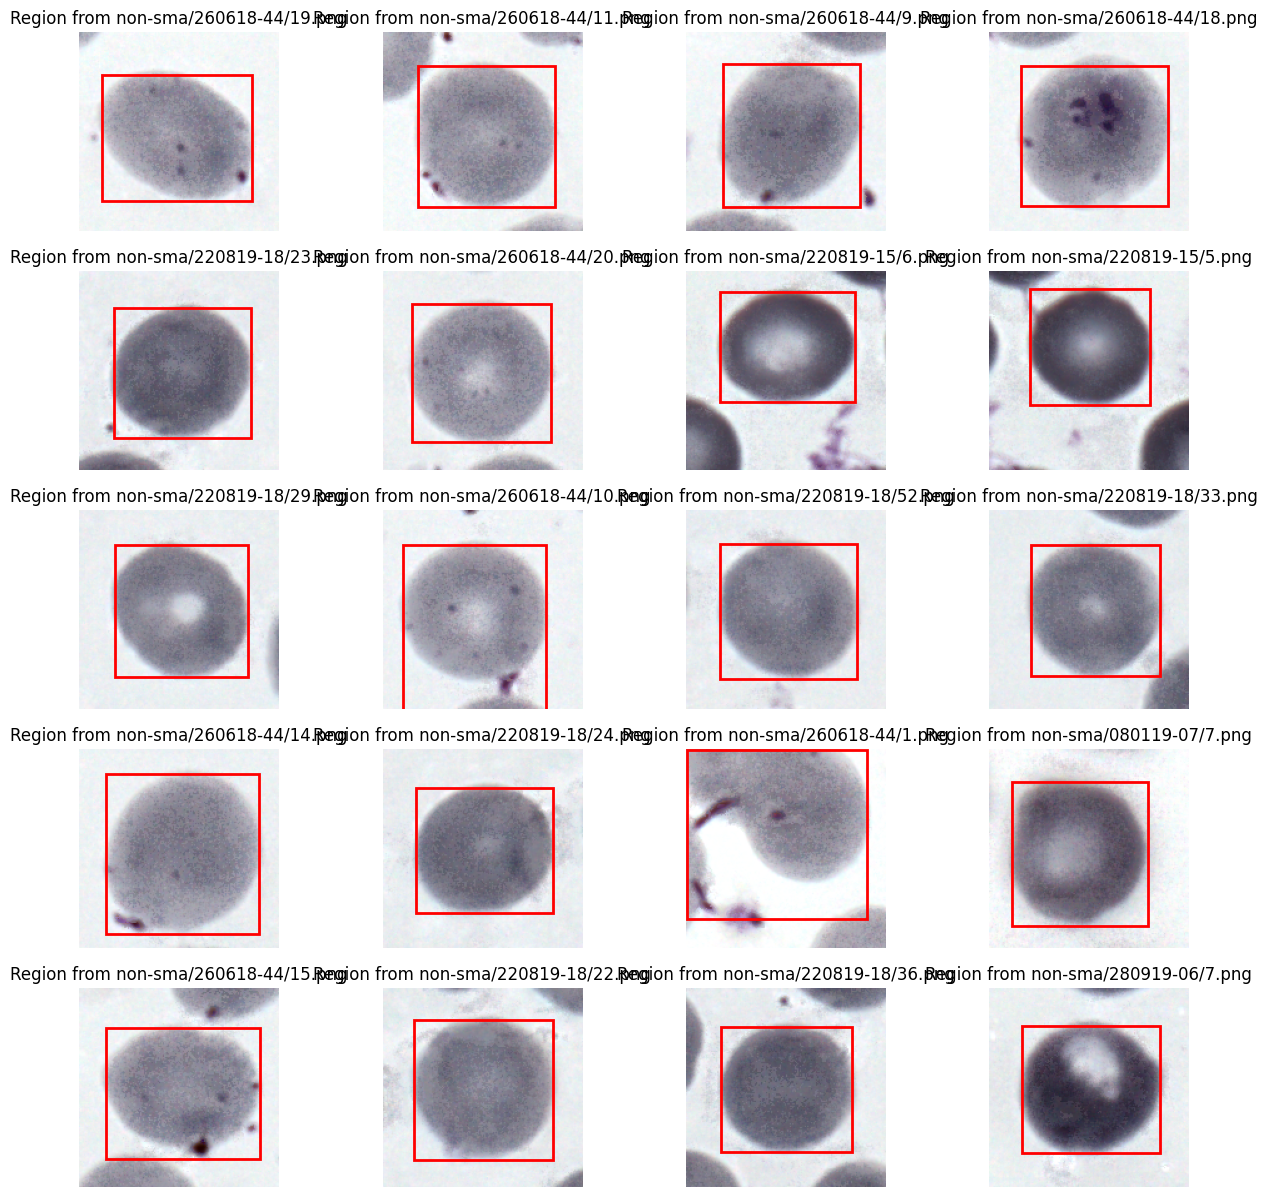

In [66]:
descriptors_numeric_highest, descriptors_numeric_lowest = rbc_comparison_utils.rbc_descriptors_comp(most_non_sma_rbcs, most_sma_rbcs)

area
area_filled
equivalent_diameter_area
eccentricity
convex_area
extent
solidity
perimeter
perimeter_crofton
circularity
compactness
convexity


/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/fabspace/anaconda3/envs/EzerM/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a futu

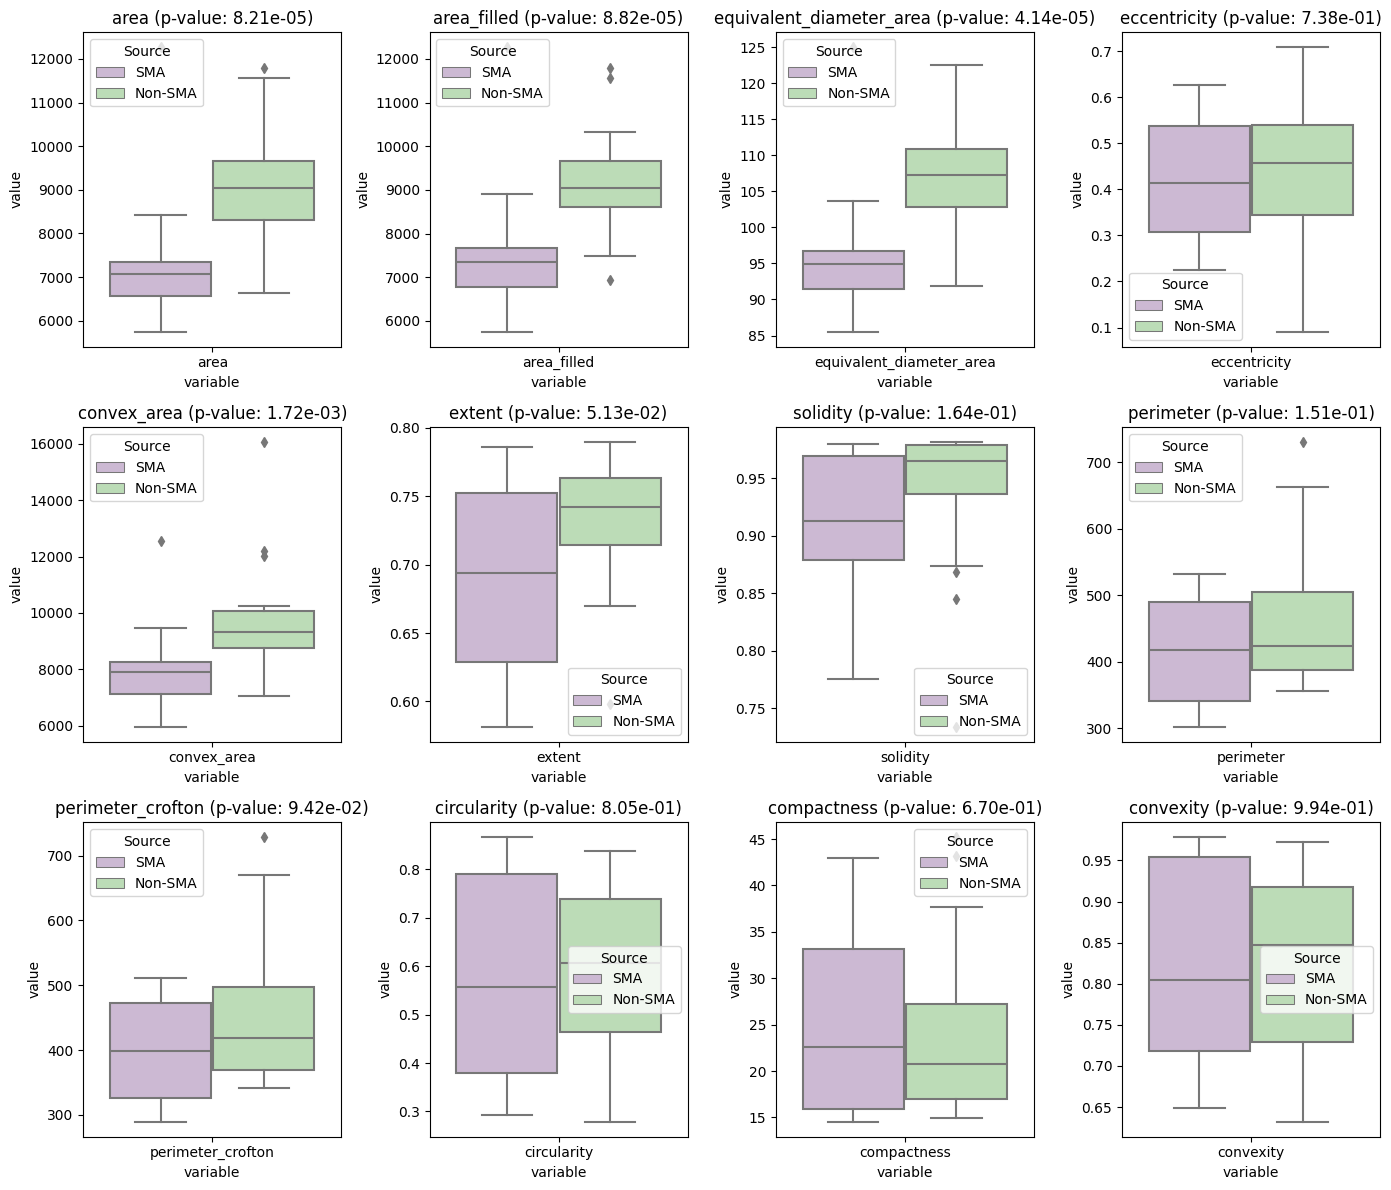

In [67]:
fig_rbc_desc_comp = rbc_comparison_utils.compare_dataframes(descriptors_numeric_highest, descriptors_numeric_lowest)